In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets/auto-mpg.parquet'

df_auto = pd.read_parquet(file)

print(df_auto.info())
df_auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(1) Simple Linear Regression

| Assumption           | What to Look For                         | How to Check                           |
| -------------------- | ---------------------------------------- | -------------------------------------- |
| **Linearity**        | Straight-line relationship               | Residuals vs Fitted plot (no curve)    |
| **Homoscedasticity** | Constant spread of errors                | Residuals vs Fitted plot (even spread) |
| **Normality**        | Bell-shaped error distribution           | Histogram or Q-Q plot of residuals     |
| **Independence**     | Errors aren’t correlated with each other | Durbin-Watson statistic                |


- Model on statsmodel library in order to check the assumptions

In [3]:
# how horsepower affects to mpg
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'horsepower']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['horsepower']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 04 May 2025   Prob (F-statistic):           7.03e-81
Time:                        15:06:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

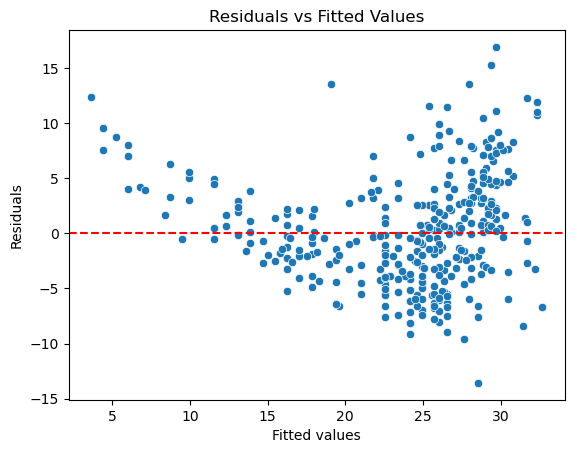

In [4]:
# Linearity & Homoscedasticity
# Residuals (difference between actual and predicted values)
y_pred = model.fittedvalues
residuals = model.resid

# Plot residuals vs fitted values
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

Values are not randomly point and they have not a constant spread for every fitted value (that's not good). It is heteroscedasticity

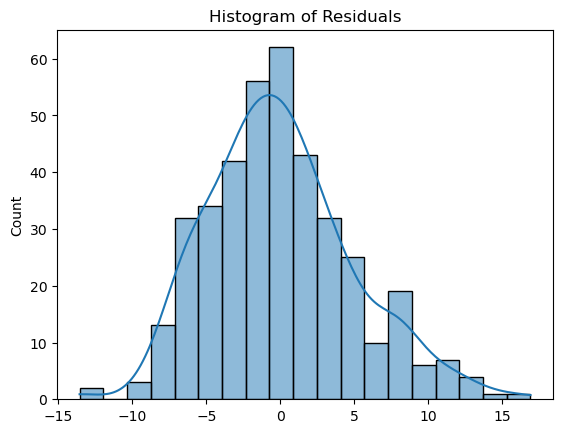

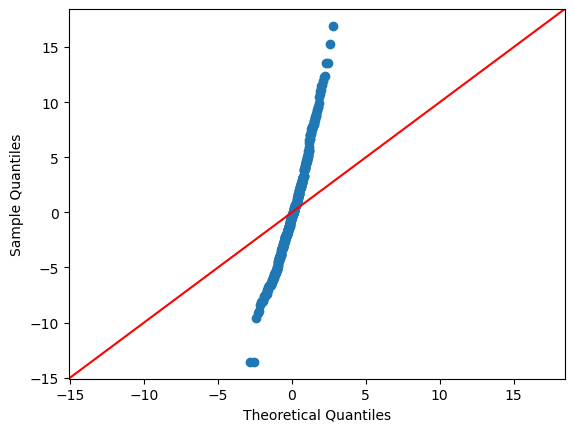

In [5]:
# Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot (should show a straight line if normal)
sm.qqplot(residuals, line ='45')
plt.show()

In [6]:
residuals.mean()

-7.250436079184696e-15

The histogram follows a normal distribution, but the qq plot not. That's why the mean of the residuals errors al closely to zero. So the assumptions are fine, because it is a straight line. 